In [53]:
import rasterio
import xarray as xr
import numpy as np
import folium
import geopandas as gpd

import matplotlib.pyplot as plt

In [54]:
pop_data = rasterio.open("../datasets/ijcai24/landscan-global-2022.tif")
# convert this to a xarray dataset
pop_np = pop_data.read(1)
lats = pop_data.xy(np.arange(pop_np.shape[0]), 0)[1]
lons = pop_data.xy(0, np.arange(pop_np.shape[1]))[0]
pop_ds = xr.Dataset({'population': (['lat', 'lon'], pop_np)},
                    coords={'lat': lats, 'lon': lons})
pop_ds['population'] = pop_ds['population'].where(pop_ds['population'] >= 0)
pop_ds

<xarray.Dataset>
Dimensions:     (lat: 21600, lon: 43200)
Coordinates:
  * lat         (lat) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
  * lon         (lon) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
Data variables:
    population  (lat, lon) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0 0.0

In [55]:
no2 = xr.open_dataset("/home/patel_zeel/aqmsp/aqmsp_data/datasets/NO2/SurfaceNO2_0.0083deg_2020.nc")
no2

<xarray.Dataset>
Dimensions:     (lat: 16200, lon: 43080)
Coordinates:
  * lat         (lat) float64 -60.05 -60.04 -60.03 -60.02 ... 74.93 74.94 74.95
  * lon         (lon) float64 -179.5 -179.5 -179.5 -179.5 ... 179.4 179.4 179.4
Data variables:
    crs         |S1 ...
    SurfaceNO2  (lat, lon) float32 ...
Attributes: (12/24)
    GDAL_AREA_OR_POINT:       Area
    Conventions:              CF-1.5
    GDAL:                     GDAL 3.1.2, released 2020/07/07
    title:                    Nitrogen Dioxide Surface-Level Annual Average C...
    NCO:                      netCDF Operators version 4.9.3 (Homepage = http...
    institution:              George Washington University, Department of Env...
    ...                       ...
    SouthBoundingCoordinate:  -60.0
    NorthBoundingCoordinate:  75.0
    WestBoundingCoordinate:   -180.0
    EastBoundingCoordinate:   180.0
    history:                  2023-02-04 12:28:24 - original file generated u...
    VersionID:                1.0

Text(0.5, 1.0, 'NO2 Concentration')

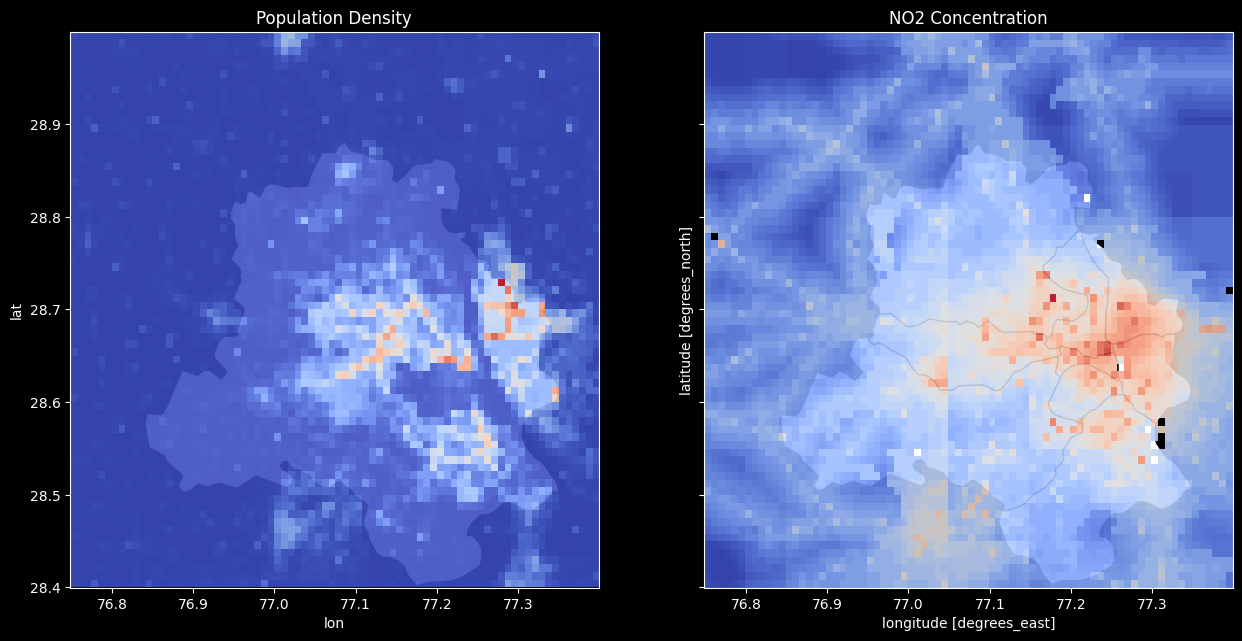

In [56]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 10))
gdf = gpd.read_file("/home/patel_zeel/aqmsp/aqmsp_data/datasets/shapefiles/delhi/Districts.shp")

gdf.plot(ax=ax[0], color="white", edgecolor="white")
pop_ds.sel(lon=slice(76.75, 77.4), lat=slice(29, 28.4))["population"].plot(ax=ax[0], cmap="coolwarm", alpha=0.9, add_colorbar=False)
ax[0].set_title("Population Density")

gdf.plot(ax=ax[1], color="white", edgecolor="black")
no2["SurfaceNO2"].sel(lon=slice(76.75, 77.4), lat=slice(28.4, 29)).plot(ax=ax[1], cmap="coolwarm", alpha=0.9, add_colorbar=False)
ax[1].set_title("NO2 Concentration")

In [57]:
a

NameError: name 'a' is not defined